In [119]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import sys
sys.path.append('../src/')
import clustering

In [121]:
iris = load_iris()
X = iris.data # Numpy array
df_X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

In [122]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [123]:
cluster = KMeans(n_clusters=3, n_init=1, init='random')

In [124]:
isinstance(df_X, pd.DataFrame)

True

In [125]:
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [126]:
cluster.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [127]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [133]:
clusters = [int(n) for n in range(1, 32)]
means = []

In [134]:
for c in clusters:
    cluster = KMeans(n_clusters=c)
    cluster.fit(X)
    lab = cluster.labels_
    cent = cluster.cluster_centers_
    df_c = clustering.get_distances(df=df_X, labels=lab, centers=cent)
    means.append(clustering.compute_distortion(df_c))

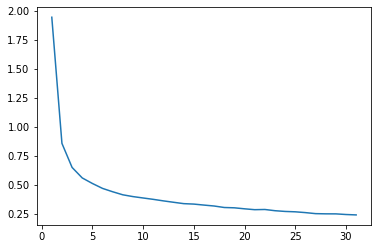

In [135]:
sns.lineplot(clusters, means)

In [136]:
df_X.loc[0, :]

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64

In [141]:
clustering.eval_KMeans(df_X, df_X.columns, 1, 10)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
